In [60]:
from tkinter import *
from PIL import Image, ImageTk
import numpy as np
import cv2
import tensorflow as ts
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pickle

In [61]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [62]:
BaseDataPath = "./CifarHundredDataset/"
MetaDataPath =  BaseDataPath + "meta"
metadata = unpickle(MetaDataPath)
superclass_dict = dict(list(enumerate(metadata[b'coarse_label_names'])))
print(superclass_dict)

{0: b'aquatic_mammals', 1: b'fish', 2: b'flowers', 3: b'food_containers', 4: b'fruit_and_vegetables', 5: b'household_electrical_devices', 6: b'household_furniture', 7: b'insects', 8: b'large_carnivores', 9: b'large_man-made_outdoor_things', 10: b'large_natural_outdoor_scenes', 11: b'large_omnivores_and_herbivores', 12: b'medium_mammals', 13: b'non-insect_invertebrates', 14: b'people', 15: b'reptiles', 16: b'small_mammals', 17: b'trees', 18: b'vehicles_1', 19: b'vehicles_2'}


In [63]:
# metadata.keys()
fineclass_dict = dict(list(enumerate(metadata[b'fine_label_names'])))
print(fineclass_dict)

{0: b'apple', 1: b'aquarium_fish', 2: b'baby', 3: b'bear', 4: b'beaver', 5: b'bed', 6: b'bee', 7: b'beetle', 8: b'bicycle', 9: b'bottle', 10: b'bowl', 11: b'boy', 12: b'bridge', 13: b'bus', 14: b'butterfly', 15: b'camel', 16: b'can', 17: b'castle', 18: b'caterpillar', 19: b'cattle', 20: b'chair', 21: b'chimpanzee', 22: b'clock', 23: b'cloud', 24: b'cockroach', 25: b'couch', 26: b'crab', 27: b'crocodile', 28: b'cup', 29: b'dinosaur', 30: b'dolphin', 31: b'elephant', 32: b'flatfish', 33: b'forest', 34: b'fox', 35: b'girl', 36: b'hamster', 37: b'house', 38: b'kangaroo', 39: b'keyboard', 40: b'lamp', 41: b'lawn_mower', 42: b'leopard', 43: b'lion', 44: b'lizard', 45: b'lobster', 46: b'man', 47: b'maple_tree', 48: b'motorcycle', 49: b'mountain', 50: b'mouse', 51: b'mushroom', 52: b'oak_tree', 53: b'orange', 54: b'orchid', 55: b'otter', 56: b'palm_tree', 57: b'pear', 58: b'pickup_truck', 59: b'pine_tree', 60: b'plain', 61: b'plate', 62: b'poppy', 63: b'porcupine', 64: b'possum', 65: b'rabbit'

In [64]:
data_train_path = BaseDataPath + "train"
data_test_path = BaseDataPath + "test"

data_train_dict = unpickle(data_train_path)
data_test_dict = unpickle(data_test_path)


# Get data (change the coarse_labels if you want to use the 100 classes)
data_train = data_train_dict[b'data']
label_train = np.array(data_train_dict[b'coarse_labels'])
data_test = data_test_dict[b'data']
label_test = np.array(data_test_dict[b'coarse_labels'])
fine_labels_train = np.array(data_train_dict[b'fine_labels'])
fine_labels_test = np.array(data_test_dict[b'fine_labels'])

In [65]:
print(fine_labels_train)
fine_labels_train.shape

[19 29  0 ...  3  7 73]


(50000,)

In [66]:
print(fine_labels_test)
fine_labels_test.shape

[49 33 72 ... 51 42 70]


(10000,)

In [67]:
print(data_train_dict.keys())

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])


In [68]:
print(label_train)
label_train.shape

[11 15  4 ...  8  7  1]


(50000,)

In [69]:
# print(label_train)
data_train.shape

(50000, 3072)

In [70]:
data_train = data_train.reshape(len(data_train), 3,32,32)
data_train = data_train.transpose(0,2,3,1)
data_train.shape

(50000, 32, 32, 3)

In [71]:
data_test = data_test.reshape(len(data_test), 3,32,32)
data_test = data_test.transpose(0,2,3,1)
data_test.shape

(10000, 32, 32, 3)

In [72]:
print(data_train)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [195 205 193]
   [212 224 204]
   [182 194 167]]

  [[255 255 255]
   [254 254 254]
   [254 254 254]
   ...
   [170 176 150]
   [161 168 130]
   [146 154 113]]

  [[255 255 255]
   [254 254 254]
   [255 255 255]
   ...
   [189 199 169]
   [166 178 130]
   [121 133  87]]

  ...

  [[148 185  79]
   [142 182  57]
   [140 179  60]
   ...
   [ 30  17   1]
   [ 65  62  15]
   [ 76  77  20]]

  [[122 157  66]
   [120 155  58]
   [126 160  71]
   ...
   [ 22  16   3]
   [ 97 112  56]
   [141 161  87]]

  [[ 87 122  41]
   [ 88 122  39]
   [101 134  56]
   ...
   [ 34  36  10]
   [105 133  59]
   [138 173  79]]]


 [[[255 255 255]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

Text(0.5, 0, 'Test Image')

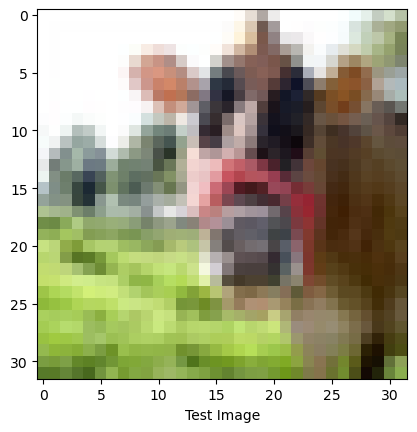

In [73]:
plt.imshow(data_train[0])
plt.xlabel("Test Image")

In [74]:
mask = (label_train == 3)
mask_test = (label_test == 3)

# If you also want to extract corresponding labels
selected_labels_train = label_train[mask]
selected_labels_test = label_test[mask_test]


selected_fine_labels_train = fine_labels_train[mask]
print(selected_fine_labels_train)
selected_fine_labels_train.shape

[28  9 61 ... 16 16 16]


(2500,)

In [75]:
selected_fine_labels_test = fine_labels_test[mask_test]
print(selected_fine_labels_test)
selected_fine_labels_test.shape

[16 61  9 10  9 10 16 10  9 28 28 16 16 28 16 28 10 61  9 10 10 10 28 16
 10 10 16 10  9 28  9 10  9 61 28 10 61 61 61 10 16 16  9 10 10 16 28  9
 10 28  9  9 16 28 10  9 16 28 61  9  9 28 61 16 28 28 28 16  9 61 28 10
 16 28  9  9 10 28 28 28  9 61  9 16 16 10  9 61 16 61 16 61 10 61 10 61
 10 16 61 28 10 28 16 28 10 28 28  9 61  9 61 28 61  9 16 16 10 28 16 10
 28 28 16 61 10 10 10  9 61 61 61 10  9  9 16 61 16  9 16 16 28 28 16 10
 10 61 16 28 61 10 10 61  9 16 61  9 61 16  9 16  9 10 10 10 16  9 10  9
  9 16 10 28 10  9 16 10  9 10 16 28  9 10 16 28  9 28 16 16 28 28 61 10
 10 28 10 61 10  9  9 28 16 10 61 61 61  9  9 16 61 10 16 61 10 61 61  9
 61  9  9 10 16 10 10 10 10 16 61 28 28 61 61 28  9  9 61  9 10 61  9 16
 10 28 16 16 28  9  9 61 16 28  9 10 61  9 28 10 28 61 61 28 28 16 16 61
 10 16 16 61  9 61 61 61 28 61 28 28 16  9 10 16 28 28 10 28 16 16 16 28
 61  9 10 16  9 16 28 28 16 28 10 16 16 61 28  9 16 61  9  9  9 10 61 16
 16 28 10 10  9 28 61 16  9 28 28  9  9 61  9 28 10

(500,)

In [76]:
# Use the mask to extract images corresponding to the selected labels
# selected_images = images[mask]
selected_images_train = data_train[mask]
selected_images_train.shape

(2500, 32, 32, 3)

In [77]:
selected_images_test = data_test[mask_test]
selected_images_test.shape

(500, 32, 32, 3)

In [78]:
# Manual label mapping
label_map = {
    9: 0,
    10: 1,
    16: 2,
    28: 3,
    61: 4
}

In [79]:
labelsTrainEncoded = np.array([label_map[label] for label in selected_fine_labels_train])
labelsTestEncoded = np.array([label_map[label] for label in selected_fine_labels_test])
print(labelsTrainEncoded)
labelsTrainEncoded.shape

[3 0 4 ... 2 2 2]


(2500,)

In [80]:
selected_fine_labels_train 
selected_fine_labels_test

array([16, 61,  9, 10,  9, 10, 16, 10,  9, 28, 28, 16, 16, 28, 16, 28, 10,
       61,  9, 10, 10, 10, 28, 16, 10, 10, 16, 10,  9, 28,  9, 10,  9, 61,
       28, 10, 61, 61, 61, 10, 16, 16,  9, 10, 10, 16, 28,  9, 10, 28,  9,
        9, 16, 28, 10,  9, 16, 28, 61,  9,  9, 28, 61, 16, 28, 28, 28, 16,
        9, 61, 28, 10, 16, 28,  9,  9, 10, 28, 28, 28,  9, 61,  9, 16, 16,
       10,  9, 61, 16, 61, 16, 61, 10, 61, 10, 61, 10, 16, 61, 28, 10, 28,
       16, 28, 10, 28, 28,  9, 61,  9, 61, 28, 61,  9, 16, 16, 10, 28, 16,
       10, 28, 28, 16, 61, 10, 10, 10,  9, 61, 61, 61, 10,  9,  9, 16, 61,
       16,  9, 16, 16, 28, 28, 16, 10, 10, 61, 16, 28, 61, 10, 10, 61,  9,
       16, 61,  9, 61, 16,  9, 16,  9, 10, 10, 10, 16,  9, 10,  9,  9, 16,
       10, 28, 10,  9, 16, 10,  9, 10, 16, 28,  9, 10, 16, 28,  9, 28, 16,
       16, 28, 28, 61, 10, 10, 28, 10, 61, 10,  9,  9, 28, 16, 10, 61, 61,
       61,  9,  9, 16, 61, 10, 16, 61, 10, 61, 61,  9, 61,  9,  9, 10, 16,
       10, 10, 10, 10, 16

In [81]:
# Normalize selected data
X_train = selected_images_train / 255
X_test = selected_images_test / 255
y_train = labelsTrainEncoded
y_test = labelsTestEncoded

In [82]:


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'relu', input_shape= (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation= 'relu', input_shape= (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [83]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )

In [84]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.2630 - loss: 1.5857
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.5185 - loss: 1.2264
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5948 - loss: 1.0686
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6596 - loss: 0.9028
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7119 - loss: 0.7906
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.7358 - loss: 0.7199
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7390 - loss: 0.6919
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7429 - loss: 0.6800
Epoch 9/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7915 - loss: 0.5858
Epoch 10/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8279 - loss: 0.5012
Epoch 11/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.8218 - loss: 0.4844
Epoch 12/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accurac

Save the model

In [ ]:
# cnn.save("ConvBeltCNNTenFlow.keras")